MALE_RECOVERED  :  366
FEMALE_RECOVERED  :  142
[366, 142]
MALE_DEATH  :  349
FEMALE_DEATH  :  145
[349, 145]


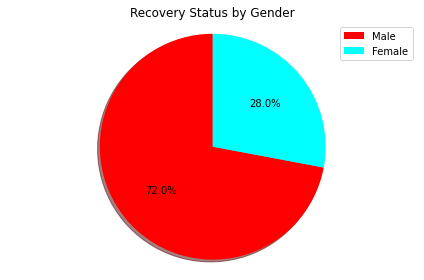

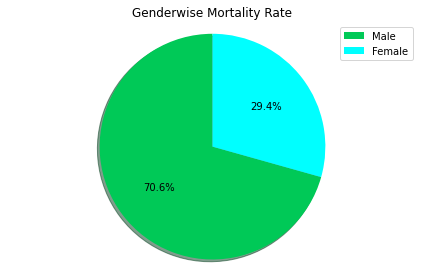

In [5]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt

df = pd.read_csv("covidDataset.csv")
colors = ['#FF0000','#00FFFF']
#'#00C957','#FFD700','#ffcc99','#99ff99','#FF34B3'
sizes = []

key_counts = {}
key_counts1 = {}
key_counts['male_recovered'] = 0 
key_counts['female_recovered'] = 0
key_counts1['male_death'] = 0
key_counts1['female_death'] = 0

for gender,status in zip(df['Gender'],df['Status']):
  if gender == 'Male':
    if status == 'Recovered':
      key_counts['male_recovered'] += 1
    else:
      key_counts1['male_death'] += 1
  else :
    if status == 'Recovered':
      key_counts['female_recovered'] += 1
    else:
      key_counts1['female_death'] += 1

for key,value in key_counts.items():
  print(key.upper()," : ",value)
  sizes.append(value)
print(sizes)

fig1, ax1 = plt.subplots()
plt.title("Recovery Status by Gender")
ax1.pie(sizes, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.tight_layout()
plt.legend(["Male","Female"])

sizes = []

for key,value in key_counts1.items():
  print(key.upper()," : ",value)
  sizes.append(value)
print(sizes)

fig1, ax1 = plt.subplots()
plt.title("Genderwise Mortality Rate")
ax1.pie(sizes, colors=['#00C957','#00FFFF'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.tight_layout()
plt.legend(["Male","Female"])
plt.show()

In [ ]:
#  Graph Plot based on Death and Recovery with date on x-axis.
first_date = df['Date'].iloc[1]
print(first_date)
death_date_data = {}
recovery_date_data = {}
death_on_that_day = 0
recovery_on_that_day = 0
for date,status in zip(df['Date'],df['Status']):
  if first_date == date :
    if status == 'Recovered':
      recovery_on_that_day+= 1
    else:
      death_on_that_day += 1
  else:
    death_date_data[first_date] = death_on_that_day
    recovery_date_data[first_date] = recovery_on_that_day
    first_date = date
    death_on_that_day = 0
    recovery_on_that_day = 0
    if status == 'Recovered':
      recovery_on_that_day+= 1
    else:
      death_on_that_day += 1

print(death_date_data)
print(recovery_date_data)    